In [1]:
#required libraries
import pandas as pd
import numpy as np

#model visulazation
import seaborn as sns
import matplotlib.pyplot as plt

#model selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#model evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from scipy.stats import shapiro,normaltest,kstest,skew
import pickle

import warnings
warnings.filterwarnings('ignore')

# 1.Problem Statement:

To predict the strength of concrete by using follwoing features
cement	
slag	
flyash	
water	
superplasticizer	
coarseaggregate	
fineaggregate
age	
	


# 2.Data Gathering

In [2]:
df=pd.read_csv("Concrete_Data_Yeh.csv")
df.head(1).T

,0
cement,540.00
slag,0.00
flyash,0.00
water,162.00
superplasticizer,2.50
coarseaggregate,1040.00
fineaggregate,676.00
age,28.00
csMPa,79.99


In [64]:
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,129.5,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.77


### Input features

cement	
slag	
flyash	
water	
superplasticizer	
coarseaggregate	
fineaggregate
age	
	

### output column (target column:)


csMPa	

# 3.EDA and Feature seelction

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
# Checking Stastical Information of Numerical features
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
# checking size of dataset
df.shape

(1030, 9)

In [6]:
# Checking Null Values
df.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [7]:
# checking data validation: whether any emptyness in the dataset
df.empty

False

In [8]:
# checking non-numeric datatype features
df.select_dtypes(exclude=[int,float])

""
0
1
2
3
4
...
1025
1026
1027
1028


means no catagorical column is present

<function matplotlib.pyplot.show(close=None, block=None)>

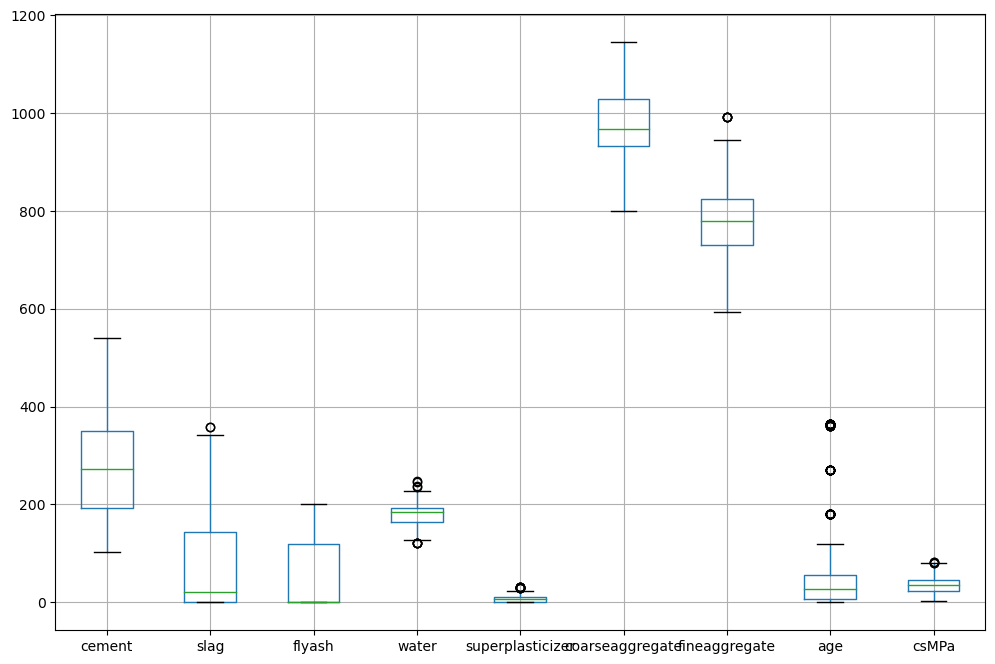

In [9]:
#for checking outliers in columns
plt.figure(figsize=(12,8))
df.select_dtypes(exclude=object).iloc[:,:].boxplot()
plt.show

# outliers Handling

In [10]:
# Outliers Detection & Handling Using IQR Method:

def iqr(feature):
    q1 = np.percentile(feature, 25)
    q3 = np.percentile(feature, 75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    return upper_bound, lower_bound

In [11]:
# Outliers Detection & Handling Using Z-Score Method:

def z_score(feature):
    mean = np.mean(feature)
    std = np.std(feature)
    upper_limit = mean + 3 * std
    lower_limit = mean - 3 * std
    return upper_limit, lower_limit

### 3.1 cement

In [12]:
df['cement']

0       540.0
1       540.0
2       332.5
3       332.5
4       198.6
        ...  
1025    276.4
1026    322.2
1027    148.5
1028    159.1
1029    260.9
Name: cement, Length: 1030, dtype: float64

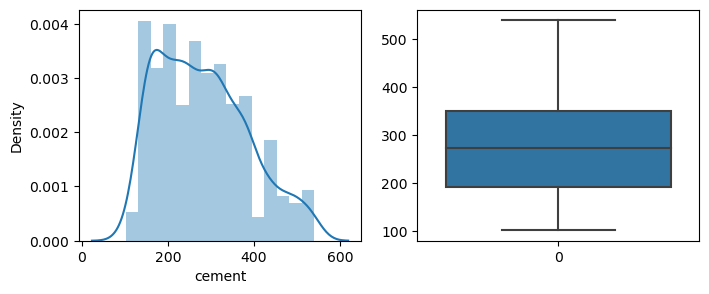

Skewness is: 0.509481178871773


In [13]:
# Checking Normal Distribution & Skewness before handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.cement)
plt.subplot(1,2,2)
sns.boxplot(df.cement)
plt.show()
print('Skewness is:', df.cement.skew())

# Observation:no outliers are present here

### 3.2 slag

In [14]:
df['slag']

0         0.0
1         0.0
2       142.5
3       142.5
4       132.4
        ...  
1025    116.0
1026      0.0
1027    139.4
1028    186.7
1029    100.5
Name: slag, Length: 1030, dtype: float64

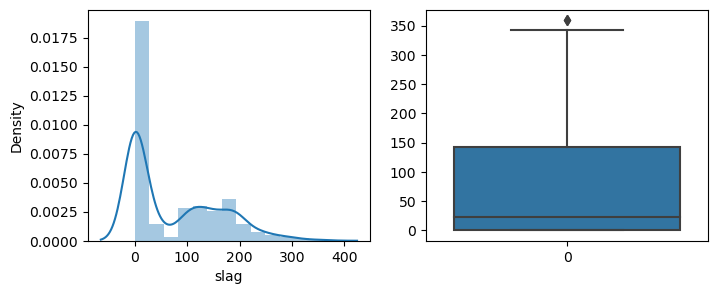

Skewness is: 0.8007168956061772


In [15]:
# Checking Normal Distribution & Skewness before handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.slag)
plt.subplot(1,2,2)
sns.boxplot(df.slag)
plt.show()
print('Skewness is:', df.slag.skew())
# Observation: Skewness is  >0.5 & Data is Right Skewed >> Use IQR Method

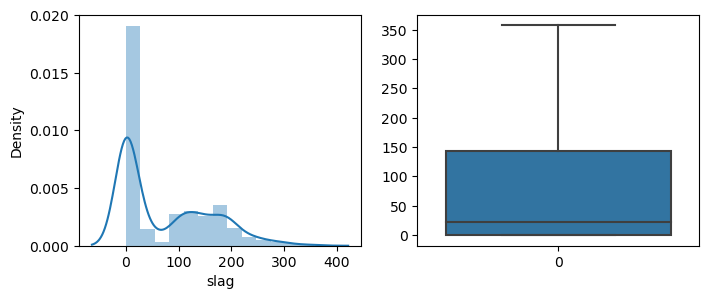

Skewness is: 0.7997238698645949


In [16]:
# Using IQR Method
df.slag = np.where(df.slag > iqr(df.slag)[0], iqr(df.slag)[0], 
                          np.where(df.slag < iqr(df.slag)[1], iqr(df.slag)[1], 
                                   df.slag))
# After Handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.slag)
plt.subplot(1,2,2)
sns.boxplot(df.slag)
plt.show()
print('Skewness is:', df.slag.skew())

### 3.3 flyash

In [17]:
df['flyash']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
1025     90.3
1026    115.6
1027    108.6
1028      0.0
1029     78.3
Name: flyash, Length: 1030, dtype: float64

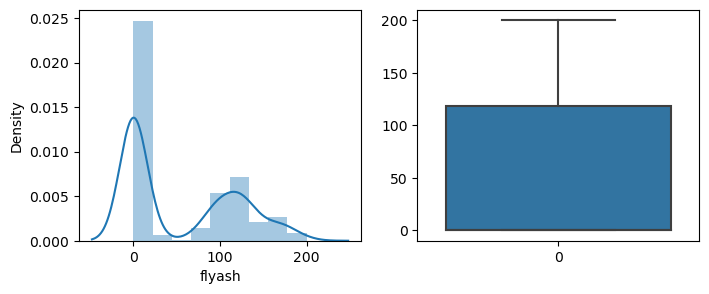

Skewness is: 0.5373539058066844


In [18]:
# Checking Normal Distribution & Skewness before handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.flyash)
plt.subplot(1,2,2)
sns.boxplot(df.flyash)
plt.show()
print('Skewness is:', df.flyash.skew())

#observation : no outliers are present in flyash column

### 3.4 water

In [19]:
df['water']

0       162.0
1       162.0
2       228.0
3       228.0
4       192.0
        ...  
1025    179.6
1026    196.0
1027    192.7
1028    175.6
1029    200.6
Name: water, Length: 1030, dtype: float64

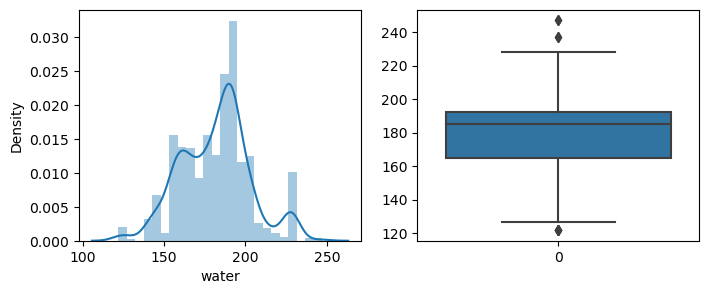

Skewness is: 0.07462838428549402


In [20]:
# Checking Normal Distribution & Skewness before handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.water)
plt.subplot(1,2,2)
sns.boxplot(df.water)
plt.show()
print('Skewness is:', df.water.skew())

#observation : outerliers are prents...data nearly normally distributed

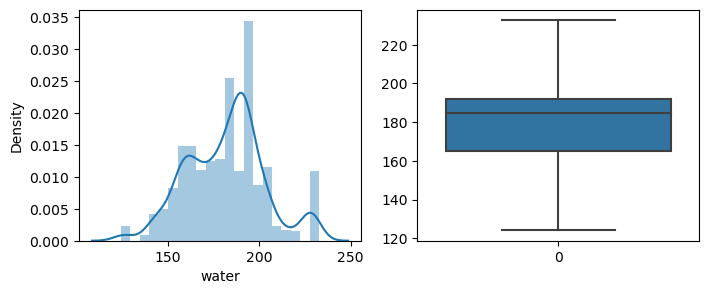

Skewness is: 0.055189874897550915


In [21]:
# Using IQR Method
df.water = np.where(df.water > iqr(df.water)[0], iqr(df.water)[0], 
                          np.where(df.water < iqr(df.water)[1], iqr(df.water)[1], 
                                   df.water))
# After Handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.water)
plt.subplot(1,2,2)
sns.boxplot(df.water)
plt.show()
print('Skewness is:', df.water.skew())

### 3.5 superplasticizer

In [22]:
df['superplasticizer']

0        2.5
1        2.5
2        0.0
3        0.0
4        0.0
        ... 
1025     8.9
1026    10.4
1027     6.1
1028    11.3
1029     8.6
Name: superplasticizer, Length: 1030, dtype: float64

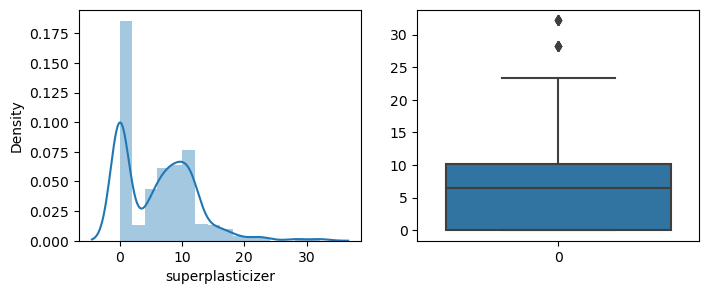

Skewness is: 0.9072025748672465


In [23]:
# Checking Normal Distribution & Skewness before handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.superplasticizer)
plt.subplot(1,2,2)
sns.boxplot(df.superplasticizer)
plt.show()
print('Skewness is:', df.superplasticizer.skew())

#observation : outerliers are prents...

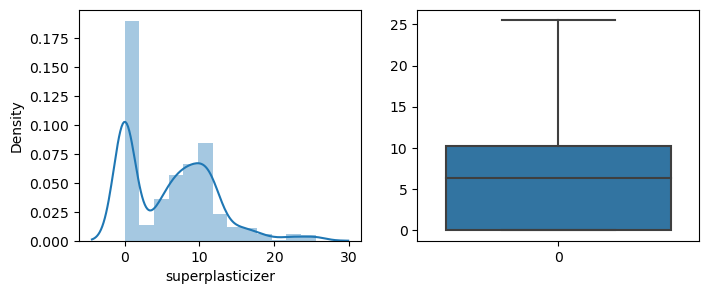

Skewness is: 0.6687191304975896


In [24]:
# Using IQR Method
df.superplasticizer = np.where(df.superplasticizer > iqr(df.superplasticizer)[0], iqr(df.superplasticizer)[0], 
                          np.where(df.superplasticizer < iqr(df.superplasticizer)[1], iqr(df.superplasticizer)[1], 
                                   df.superplasticizer))
# After Handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.superplasticizer)
plt.subplot(1,2,2)
sns.boxplot(df.superplasticizer)
plt.show()
print('Skewness is:', df.superplasticizer.skew())




### 3.6 coarseaggregate

In [25]:
df['coarseaggregate']

0       1040.0
1       1055.0
2        932.0
3        932.0
4        978.4
         ...  
1025     870.1
1026     817.9
1027     892.4
1028     989.6
1029     864.5
Name: coarseaggregate, Length: 1030, dtype: float64

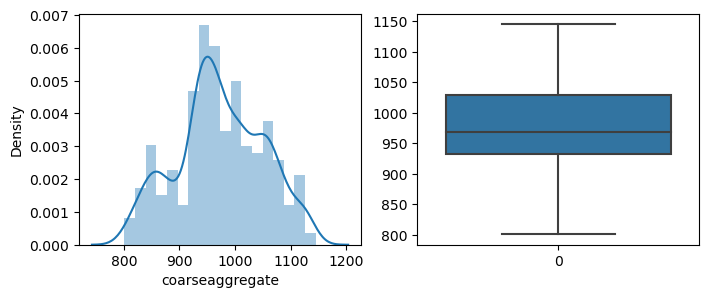

Skewness is: -0.04021974481106706


In [26]:
### Checking Normal Distribution & Skewness before handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.coarseaggregate)
plt.subplot(1,2,2)
sns.boxplot(df.coarseaggregate)
plt.show()
print('Skewness is:', df.coarseaggregate.skew())

#observation : no outerliers are prents...

### 3.7 fineaggregate

In [27]:
df['fineaggregate']

0       676.0
1       676.0
2       594.0
3       594.0
4       825.5
        ...  
1025    768.3
1026    813.4
1027    780.0
1028    788.9
1029    761.5
Name: fineaggregate, Length: 1030, dtype: float64

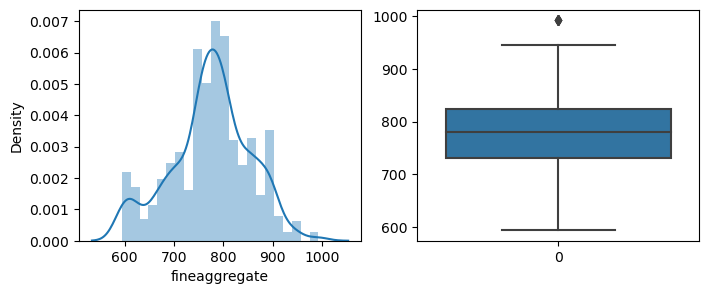

Skewness is: -0.25300959769707576


In [28]:
# Checking Normal Distribution & Skewness before handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.fineaggregate)
plt.subplot(1,2,2)
sns.boxplot(df.fineaggregate)
plt.show()
print('Skewness is:', df.fineaggregate.skew())

#observation : outerliers are prents...

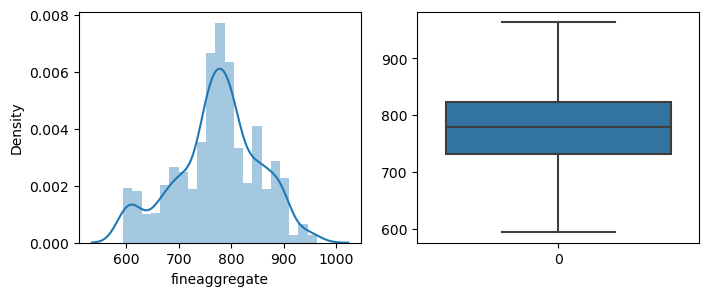

Skewness is: -0.28607726572055037


In [29]:
# Using IQR Method
df.fineaggregate = np.where(df.fineaggregate > iqr(df.fineaggregate)[0], iqr(df.fineaggregate)[0], 
                          np.where(df.fineaggregate < iqr(df.fineaggregate)[1], iqr(df.fineaggregate)[1], 
                                   df.fineaggregate))
# After Handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.fineaggregate)
plt.subplot(1,2,2)
sns.boxplot(df.fineaggregate)
plt.show()
print('Skewness is:', df.fineaggregate.skew())



### 3.8 age

In [30]:
df['age']

0        28
1        28
2       270
3       365
4       360
       ... 
1025     28
1026     28
1027     28
1028     28
1029     28
Name: age, Length: 1030, dtype: int64

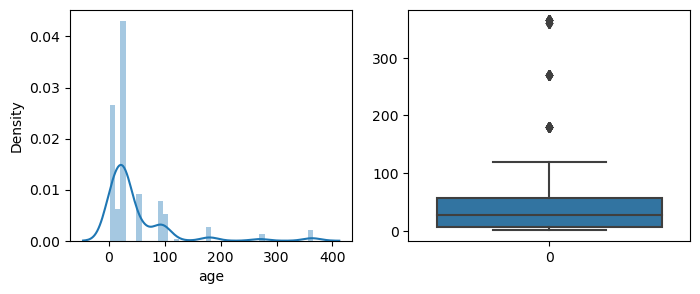

Skewness is: 3.26917740063459


In [31]:
# Checking Normal Distribution & Skewness before handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.age)
plt.subplot(1,2,2)
sns.boxplot(df.age)
plt.show()
print('Skewness is:', df.age.skew())

#observation : outerliers are prents...

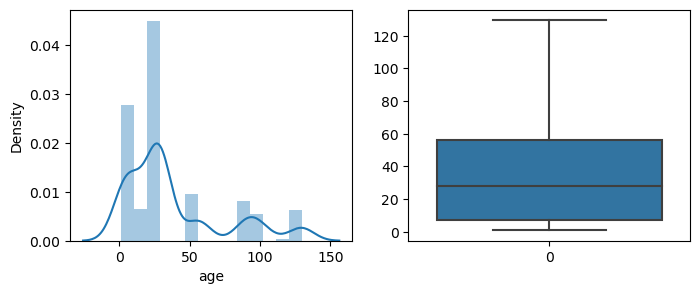

Skewness is: 1.2642076520331849


In [32]:
# Using IQR Method
df.age = np.where(df.age > iqr(df.age)[0], iqr(df.age)[0], 
                          np.where(df.age < iqr(df.age)[1], iqr(df.age)[1], 
                                   df.age))
# After Handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.age)
plt.subplot(1,2,2)
sns.boxplot(df.age)
plt.show()
print('Skewness is:', df.age.skew())


<function matplotlib.pyplot.show(close=None, block=None)>

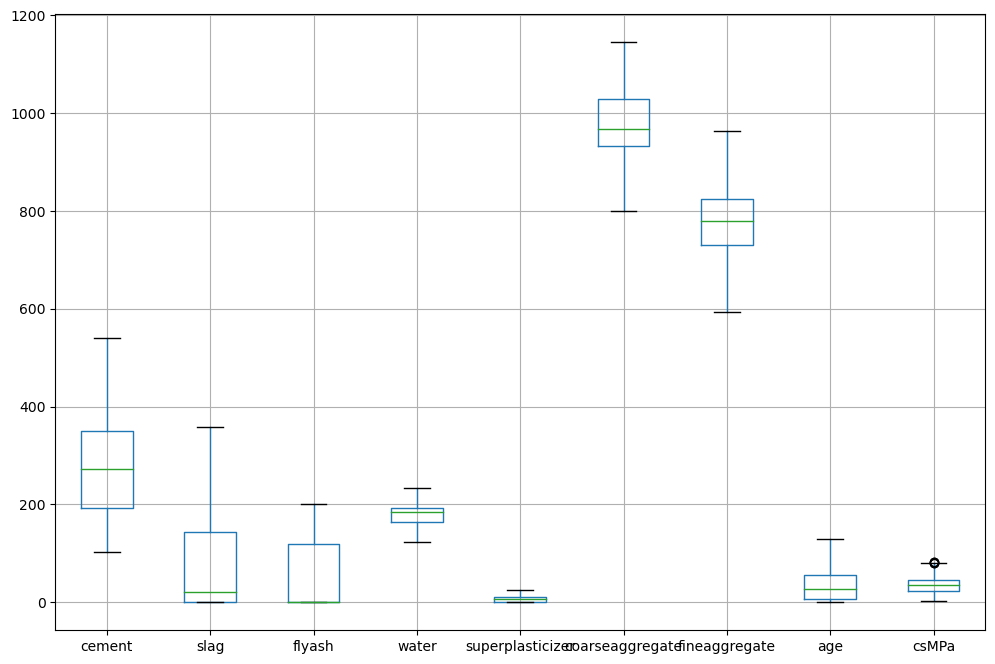

In [33]:
# Boxplot of entire dataset
plt.figure(figsize=(12,8))
df.select_dtypes(exclude=object).iloc[:,:].boxplot()
plt.show

# All outliers has been handled successfully

# 4 feature selection

### 1.linearity

In [34]:
df.corr()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275239,-0.397467,-0.081617,0.079619,-0.109349,-0.225311,0.054325,0.497832
slag,-0.275239,1.000000,-0.323590,0.107031,0.043724,-0.284023,-0.283263,-0.052703,0.134859
flyash,-0.397467,-0.323590,1.000000,-0.258379,0.395319,-0.009961,0.080962,-0.092704,-0.105755
water,-0.081617,0.107031,-0.258379,1.000000,-0.665260,-0.180249,-0.448979,0.189637,-0.291203
superplasticizer,0.079619,0.043724,0.395319,-0.665260,1.000000,-0.261624,0.216947,-0.122913,0.366375
coarseaggregate,-0.109349,-0.284023,-0.009961,-0.180249,-0.261624,1.000000,-0.176542,0.012295,-0.164935
fineaggregate,-0.225311,-0.283263,0.080962,-0.448979,0.216947,-0.176542,1.000000,-0.096565,-0.169584
age,0.054325,-0.052703,-0.092704,0.189637,-0.122913,0.012295,-0.096565,1.000000,0.469625
csMPa,0.497832,0.134859,-0.105755,-0.291203,0.366375,-0.164935,-0.169584,0.469625,1.000000


<Axes: >

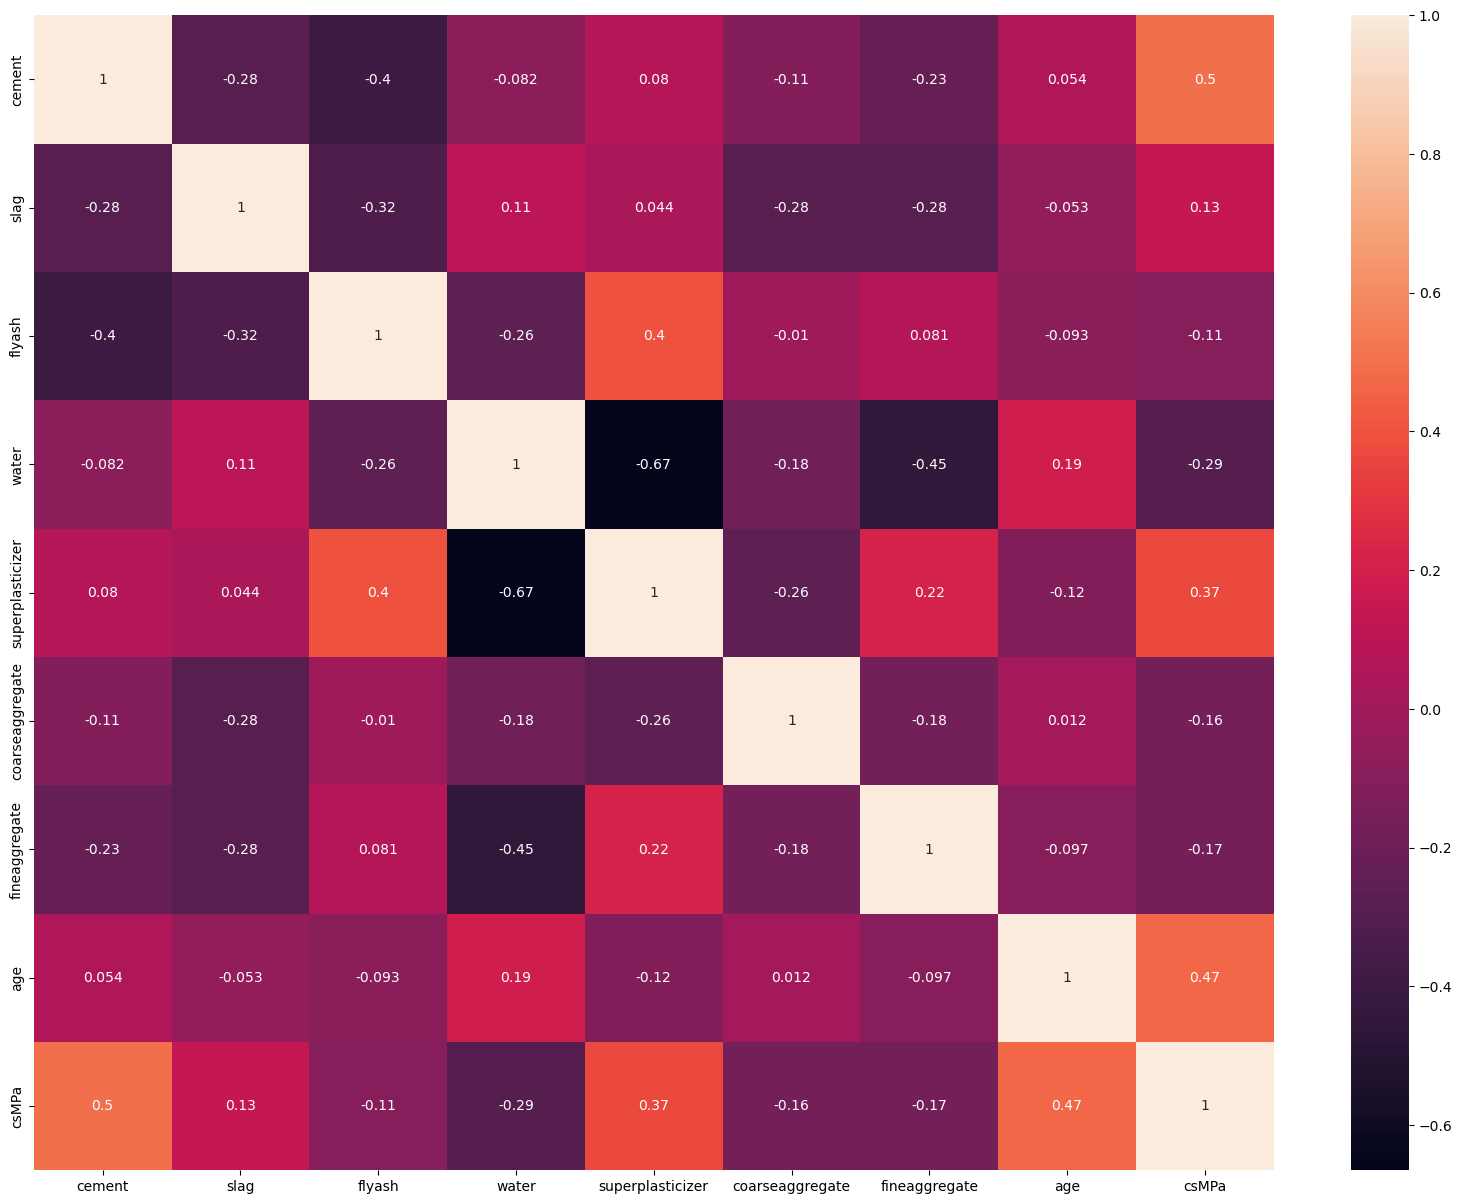

In [35]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

<Axes: >

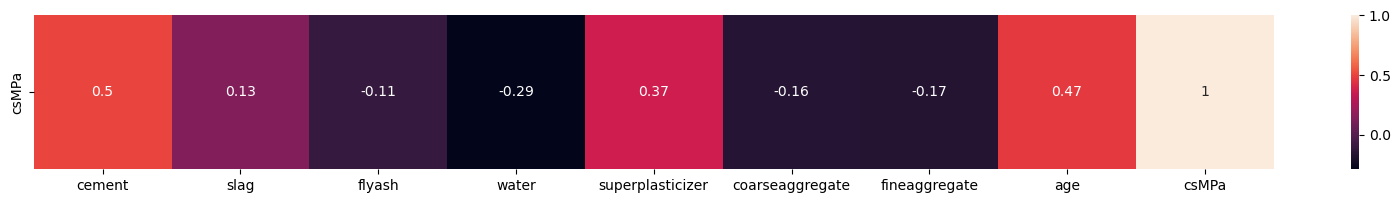

In [36]:
plt.figure(figsize=(20,2))
sns.heatmap(df.corr().tail(1),annot=True)

### 2.no multucolinearity

In [37]:
x=df.drop('csMPa',axis=1)

<Axes: >

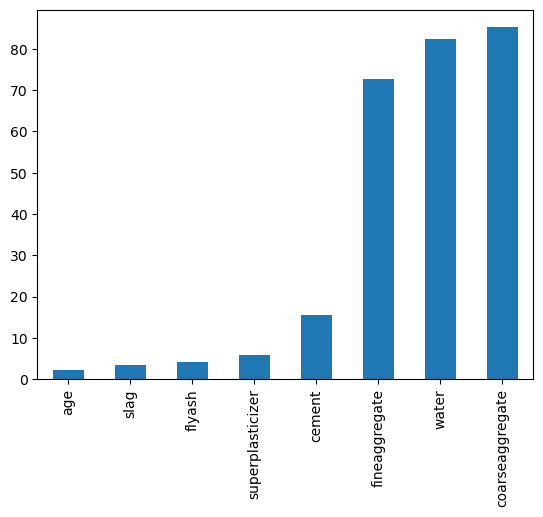

In [38]:
vif_list=[variance_inflation_factor(x.to_numpy(),i) for i in range(x.shape[1])]
vif_values=pd.Series(vif_list,index=x.columns)
vif_values.sort_values().plot(kind='bar')

In [39]:
x=df.drop('csMPa',axis=1)
y=df['csMPa']

### train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
x_train

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
784,331.0,0.0,0.0,192.0,0.0,879.0,825.0,3.0
281,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,28.0
669,288.0,192.0,0.0,192.0,0.0,932.0,717.8,3.0
424,173.5,50.1,173.5,164.8,6.5,1006.2,793.5,14.0
821,322.0,0.0,0.0,203.0,0.0,974.0,800.0,14.0
...,...,...,...,...,...,...,...,...
740,297.0,0.0,0.0,186.0,0.0,1040.0,734.0,7.0
73,425.0,106.3,0.0,151.4,18.6,936.0,803.7,3.0
998,304.8,0.0,99.6,196.0,9.8,959.4,705.2,28.0
206,212.1,0.0,121.6,180.3,5.7,1057.6,779.3,28.0


# 5. model training

### instancing the object of linear regression model

In [41]:
linear_reg=LinearRegression()
linear_reg

LinearRegression()

### train the model

In [42]:
linear_reg.fit(x_train,y_train)  # gradient decsent algorithm working backend

LinearRegression()

In [43]:
linear_reg.coef_

array([ 0.11771558,  0.09728817,  0.07861638, -0.15801133,  0.29329946,
        0.01375974,  0.01255771,  0.25850953])

In [44]:
linear_reg.intercept_

-15.007598209805387

In [45]:
linear_reg.n_features_in_

8

# 6.model evalution

### evalution on testing data

In [46]:
y_pred=linear_reg.predict(x_test)


In [47]:
mse=mean_squared_error(y_test,y_pred)
print("mean_squared_error",mse)

rmse=np.sqrt(mse)
print("root_mean_squared_error",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("mean_absolute_error",mae)

r2_squared=r2_score(y_test,y_pred)
print("r suqared values: ",r2_squared)

n=x_test.shape[0]
k=x_test.shape[1]

adj_r2=1-((1-r2_squared)*(n-1))/(n-k-1)

print("adjusted r2sqaured values: ",adj_r2)

mean_squared_error 79.26222816006705
root_mean_squared_error 8.902933682784965
mean_absolute_error 6.981979577007306
r suqared values:  0.6620440588208428
adjusted r2sqaured values:  0.6483199596866638


### evaluation on training data

In [48]:
y_pred_train=linear_reg.predict(x_train)

In [49]:
mse=mean_squared_error(y_train,y_pred_train)
print("mean_squared_error",mse)

rmse=np.sqrt(mse)
print("root_mean_squared_error",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("mean_absolute_error",mae)

r2_squared=r2_score(y_train,y_pred_train)
print("r suqared values: ",r2_squared)

n=x_test.shape[0]
k=x_test.shape[1]

adj_r2=1-((1-r2_squared)*(n-1))/(n-k-1)

print("adjusted r2sqaured values: ",adj_r2)

mean_squared_error 74.95927620404328
root_mean_squared_error 8.65790252913737
mean_absolute_error 6.697801964899444
r suqared values:  0.7414072181381013
adjusted r2sqaured values:  0.7309059884178211


In [50]:
#assumptions of linear regreesion ...check after models training

In [51]:
y_pred=linear_reg.predict(x_test)
residuals=y_test - y_pred
print("residuals:",residuals)

residuals: 34      9.158740
33    -16.511063
478     4.110074
614    -3.504140
236    13.575257
         ...    
808    -0.738504
138     1.865664
936     8.503339
592     5.824454
419    -1.711698
Name: csMPa, Length: 206, dtype: float64


### Normality of residuals

### 1.visualaztion

<Axes: xlabel='csMPa', ylabel='Density'>

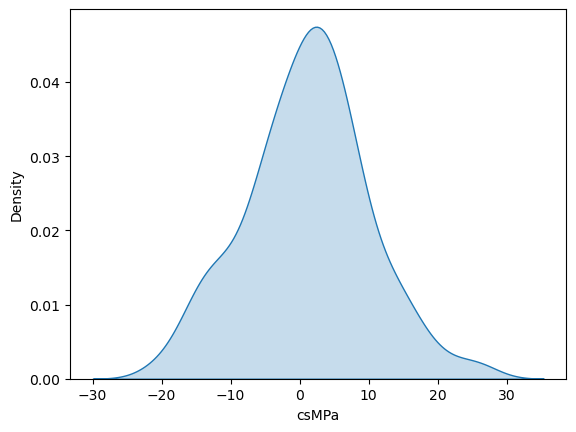

In [52]:
#kdeplot
sns.kdeplot(residuals,fill=True)

<Axes: xlabel='csMPa', ylabel='Count'>

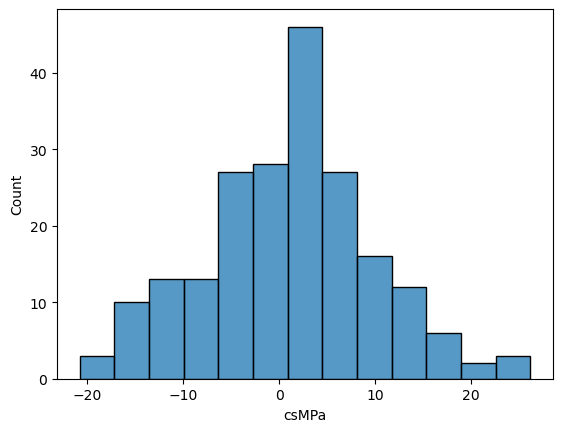

In [53]:
sns.histplot(residuals)

<Axes: xlabel='csMPa', ylabel='Density'>

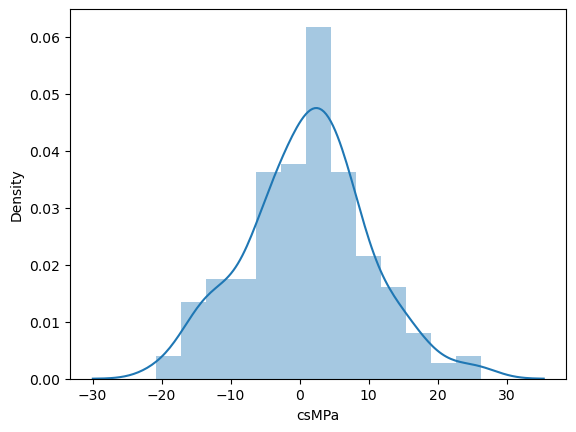

In [54]:
sns.distplot(residuals)

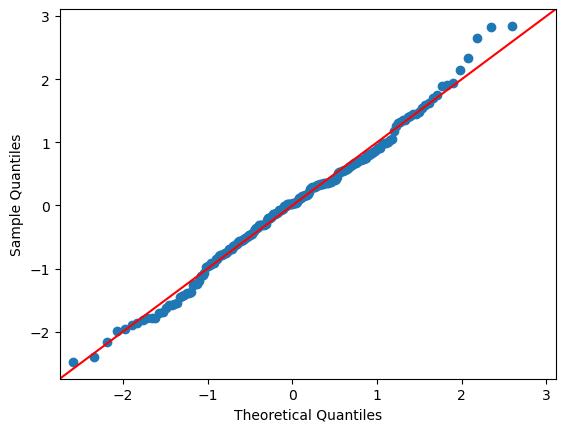

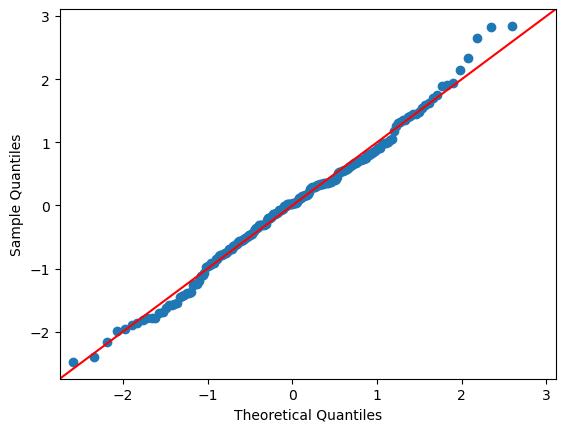

In [55]:
#QQPlot
sm.qqplot(residuals,line='45',fit=True)

### 3.Hypothesie testing

In [56]:
#shapiro

_,p_val=shapiro(residuals)
print("p val:",p_val)

if p_val >=0.05:
    print("Data is normally distributed")
    print("null hypothesis is true")
    
else:
    print("Data is not normally distributed")
    print("null hypothesis is true")
    
    

p val: 0.3201354742050171
Data is normally distributed
null hypothesis is true


In [57]:
#skewness

mean1=residuals.mean()
median1=residuals.median()
skew1=residuals.skew()

print("mean:",mean1)
print("median:",median1)
print("skewness:",skew1)

if mean1 > median1:
    print("data is postively skewd")
    
elif median1 >mean1:
    print("data is negatively skewed")
else:
    print("data is symmertic")

mean: 1.0848600495772833
median: 1.3619978265120238
skewness: 0.07135921038188688
data is negatively skewed


### 4homoscadascity

In [58]:
residuals_train=y_train -y_pred_train

<Axes: xlabel='csMPa', ylabel='csMPa'>

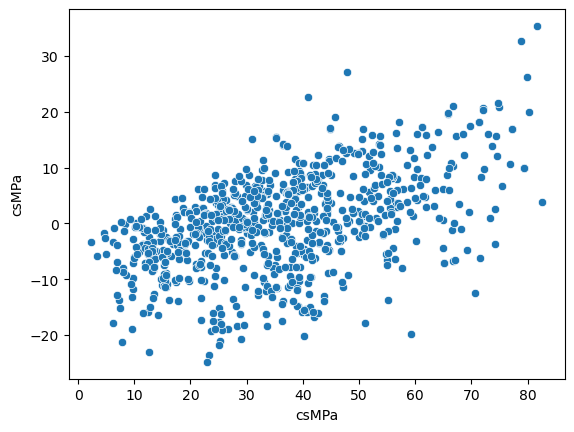

In [59]:
sns.scatterplot(x=y_train,y=residuals_train)

### testing on single row

In [60]:
x_test[20:21].T

,687
cement,236.0
slag,157.0
flyash,0.0
water,192.0
superplasticizer,0.0
coarseaggregate,972.6
fineaggregate,749.1
age,90.0


In [61]:
cement=236.0
slag=157.0
flyash=0.0
water=192.0
superplasticizer=0.0
coarseaggregate=972.6
fineaggregate=749.1
age=90.0

test_array=np.zeros((1,linear_reg.n_features_in_))
test_array[0][0]=cement
test_array[0][1]=slag
test_array[0][2]=flyash
test_array[0][3]=water
test_array[0][4]=superplasticizer
test_array[0][5]=coarseaggregate
test_array[0][6]=fineaggregate
test_array[0][7]=age

predicted_strenth=np.around(linear_reg.predict(test_array)[0],3)
predicted_strenth



43.765

In [62]:
linear_reg.predict(x_test[20:21])

array([43.76490893])

In [63]:
with open("concrete_strength.pkl",'wb') as f:
    pickle.dump(linear_reg,f)